In [24]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

class Net(nn.Module):
    def __init__(self, in_features, hi_features, out_features):
        super(Net, self).__init__()
        # 
        self.layer1 = nn.Sequential(nn.Linear(in_features, hi_features), nn.ReLU(True))
        self.layer2 = nn.Linear(hi_features, out_features)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        return x

In [25]:
model = Net(28*28, 100, 10)
# 损失函数
criterion = nn.CrossEntropyLoss()
# 优化函数（梯度下降法）
optimzer = optim.SGD(model.parameters(), lr=0.02)

# 加载数据,Pytorch提供了一些数据
data_tf = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5])
    ])

train_data = datasets.MNIST('./data', train=True, download=True, transform=data_tf)
test_data = datasets.MNIST('./data', train=False, download=True, transform=data_tf)
train_loader = DataLoader(train_data)
test_loader = DataLoader(test_data)

for img, label in train_data:
    label = torch.tensor([label])
    img = img.reshape(img.shape[0], -1)
    out = model(img)
    loss = criterion(out, label)

    optimzer.zero_grad()
    loss.backward()
    optimzer.step()

<IPython.core.display.Javascript object>


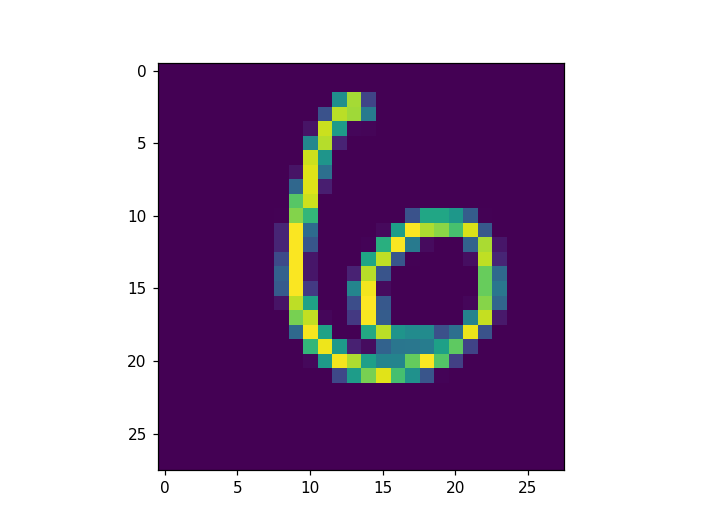

tensor([[ 1.3922, -0.5083,  1.7755,  0.1791, -3.7842,  2.7790,  9.5902, -5.4955,
         -1.5623, -8.4676]], grad_fn=<AddmmBackward>)
tensor([6])


In [27]:
# 单个案例预测
from matplotlib import pyplot as plt
%matplotlib notebook

model.eval()
img, label = test_data[100]
img = img.reshape(img.shape[0], -1)
plt.imshow(img.reshape((28,-1)))
out = model(img)
print(out)
pred = torch.max(out, 1)[1]
print(pred)

In [28]:
correct = 0
for img, label in test_data:
    label = torch.tensor([label])
    img = img.reshape(img.shape[0], -1)
    out = model(img)
    loss = criterion(out, label)
    pred = torch.max(out, 1)[1]
    correct += int(pred == label)
print(correct / len(test_data))

0.8842
